In [51]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [53]:
X_train.shape

(50000, 32, 32, 3)

In [54]:
X_test.shape

(10000, 32, 32, 3)

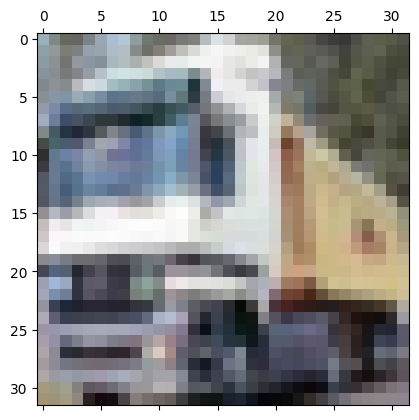

In [55]:
plt.matshow(X_train[1])

In [56]:
def plot_sample(x,index):
    plt.figure(figsize=(10,15))
    plt.matshow(x[index])

<Figure size 1000x1500 with 0 Axes>

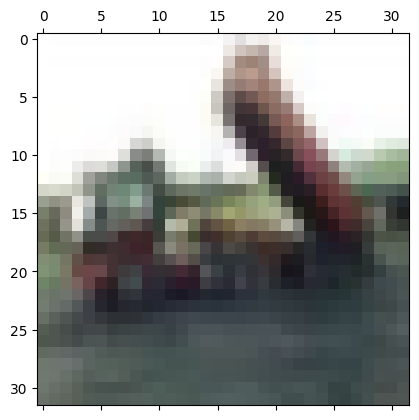

In [57]:
plot_sample(X_train,2)

In [58]:
y_train.shape

(50000, 1)

In [59]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [60]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [61]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [62]:
X_train=X_train/255
y_train=y_train/255

In [63]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [64]:
cnn=keras.Sequential([
    #Cnn
    keras.layers.Conv2D(filters=32,activation="relu",kernel_size=(3,3),input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(filters=64,activation="relu",kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10,activation="softmax"),

])

cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
cnn.fit(X_train,y_train,epochs=10,batch_size=1000)

Epoch 1/10
